# Podstawy multimediów - lab_4

In [13]:
import time 

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
##### dane na Google Drive
from google.colab import drive
drive.mount("/content/drive")
data_dir = "/content/drive/My Drive/WMM/lab4/obrazy_testowe/color_noise/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  numer_obrazu = numer_indeksu % liczba_obrazow
  
  numer_obrazu = 323719 % 36 = 7 (boat2_col.png)



# Zadanie 1

In [15]:
def imshow(img, img_title="image"):  ### 'opakowanie' na cv2_imshow(), żeby 'uzgodnić' parametry wywołania
  cv2_imshow(img) 

def printi(img, img_title="image"):
    print(f"{img_title}, wymiary: {img.shape}, typ danych: {img.dtype}, wartości: {img.min()} - {img.max()}")

# Funkcja PSNR

In [16]:
def calcPSNR(img1, img2):
  imax = 255.**2  ### zakładana wartość pikseli z przedziału [0, 255]
  ##### w różnicy obrazów istotne są wartości ujemne, dlatego img1 konwertowany do typu np.float64 (liczby rzeczywiste) aby nie ograniczać wyniku do przedziału [0, 255]
  mse = ((img1.astype(np.float64)-img2)**2).sum()/img1.size  ### img1.size - liczba elementów w img1, ==img1.shape[0]*img1.shape[1] dla obrazów mono, ==img1.shape[0]*img1.shape[1]*img1.shape[2] dla obrazów barwnych
  return 10.0*np.log10(imax/mse)

# PSNR dla obrazków zaszumionych

In [17]:
from google.colab.patches import cv2_imshow

image_original = cv2.imread(data_dir+"../color/boat2_col.png", cv2.IMREAD_UNCHANGED)
imageNoise = cv2.imread(data_dir+"boat2_col_noise.png", cv2.IMREAD_UNCHANGED)
imageINoise = cv2.imread(data_dir+"../color_inoise1/boat2_col_inoise.png", cv2.IMREAD_UNCHANGED)

cv2_imshow(imageNoise)
printi(imageNoise, "imageNoise")
psnr = calcPSNR(image_original, imageNoise)
print(f"psnr = {psnr}")

cv2_imshow(imageINoise)
printi(imageINoise, "imageINoise")
psnr = calcPSNR(image_original, imageINoise)
print(f"psnr = {psnr}")

Output hidden; open in https://colab.research.google.com to view.

# Filtry Gaussa i Filtry medianowy 

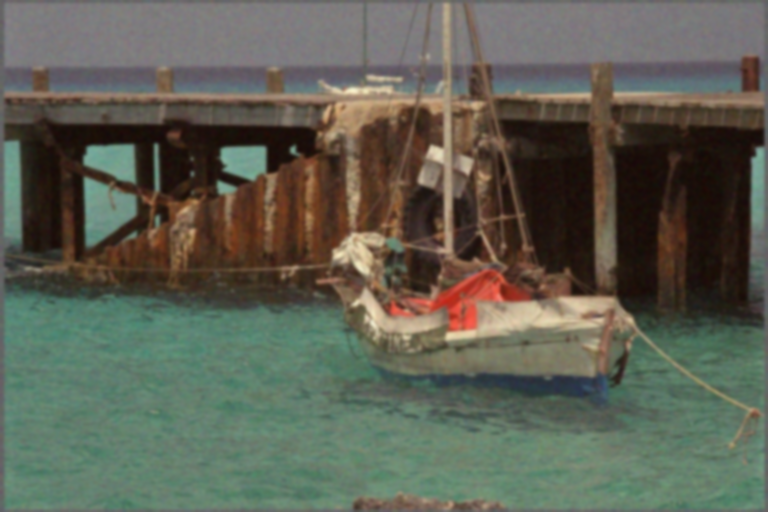

col_gblur, wymiary: (512, 768, 3), typ danych: uint8, wartości: 4 - 249
psnr = 25.913825630320765


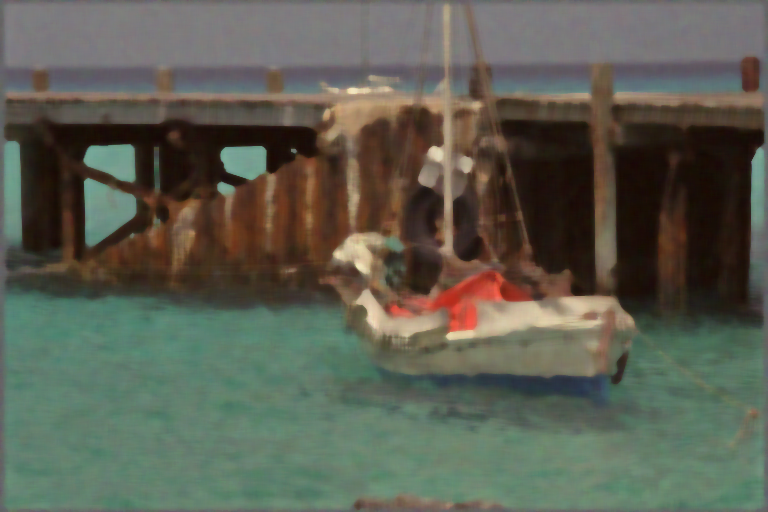

col_mblur, wymiary: (512, 768, 3), typ danych: uint8, wartości: 0 - 246
psnr = 24.381096232576166


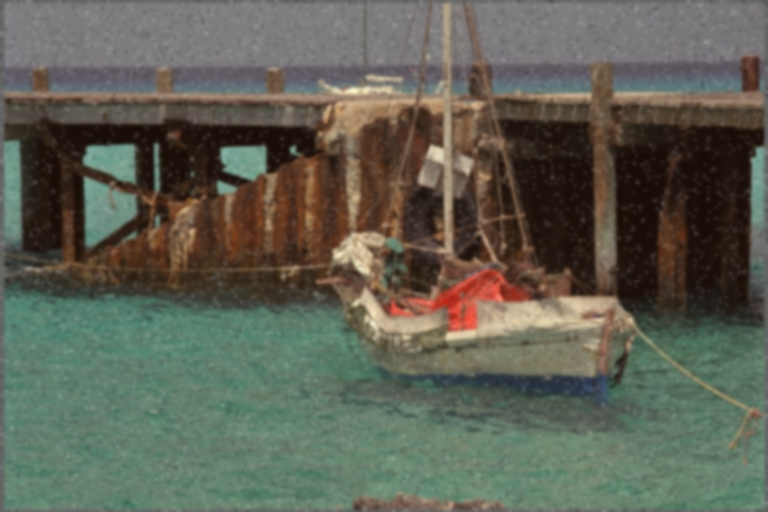

col_gblur, wymiary: (512, 768, 3), typ danych: uint8, wartości: 5 - 249
psnr = 25.514834942639418


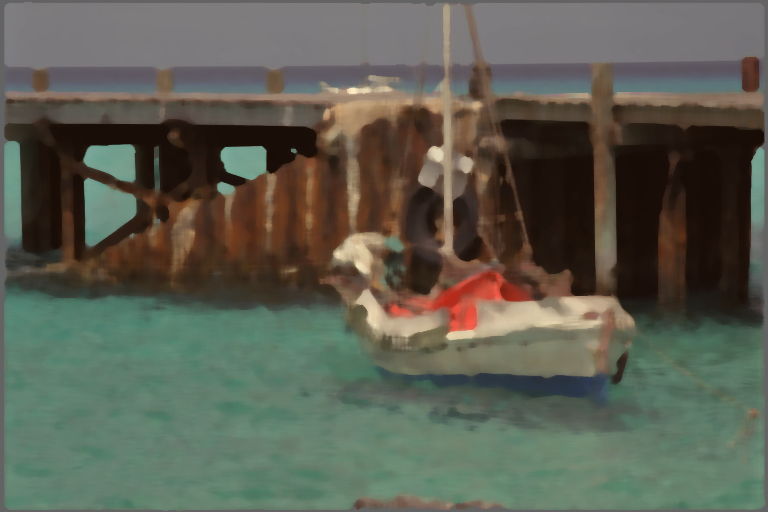

col_mblur, wymiary: (512, 768, 3), typ danych: uint8, wartości: 6 - 252
psnr = 24.497296494919784


In [19]:
# Filtry dla Noise
col_gblur = cv2.GaussianBlur(imageNoise, (9, 9), 0)
imshow(col_gblur)
printi(col_gblur, "col_gblur")
psnr = calcPSNR(image_original, col_gblur)
print(f"psnr = {psnr}")

col_mblur = cv2.medianBlur(imageNoise, 9)
imshow(col_mblur)
printi(col_mblur, "col_mblur")
psnr = calcPSNR(image_original, col_mblur)
print(f"psnr = {psnr}")

# FIltry dla iNoise
col_gblur = cv2.GaussianBlur(imageINoise, (9, 9), 0)
imshow(col_gblur)
printi(col_gblur, "col_gblur")
psnr = calcPSNR(image_original, col_gblur)
print(f"psnr = {psnr}")

col_mblur = cv2.medianBlur(imageINoise, 9)
imshow(col_mblur)
printi(col_mblur, "col_mblur")
psnr = calcPSNR(image_original, col_mblur)
print(f"psnr = {psnr}")

# Ocena działania filtra Gaussa dla masek o rozmiarach: 3x3, 5x5, 7x7: 

In [20]:
# dla filtrów Noise
col_gblur = cv2.GaussianBlur(imageNoise, (3, 3), 0)
imshow(col_gblur)
printi(col_gblur, "col_gblur3x3")
psnr = calcPSNR(image_original, col_gblur)
print(f"psnr = {psnr}")

col_gblur = cv2.GaussianBlur(imageNoise, (5, 5), 0)
imshow(col_gblur)
printi(col_gblur, "col_gblur5x5")
psnr = calcPSNR(image_original, col_gblur)
print(f"psnr = {psnr}")

col_gblur = cv2.GaussianBlur(imageNoise, (7, 7), 0)
imshow(col_gblur)
printi(col_gblur, "col_gblur7x7")
psnr = calcPSNR(image_original, col_gblur)
print(f"psnr = {psnr}")

# dla filtrów iNoise
col_gblur = cv2.GaussianBlur(imageINoise, (3, 3), 0)
imshow(col_gblur)
printi(col_gblur, "col_gblur3x3")
psnr = calcPSNR(image_original, col_gblur)
print(f"psnr = {psnr}")

col_gblur = cv2.GaussianBlur(imageINoise, (5, 5), 0)
imshow(col_gblur)
printi(col_gblur, "col_gblur5x5")
psnr = calcPSNR(image_original, col_gblur)
print(f"psnr = {psnr}")

col_gblur = cv2.GaussianBlur(imageINoise, (7, 7), 0)
imshow(col_gblur)
printi(col_gblur, "col_gblur7x7")
psnr = calcPSNR(image_original, col_gblur)
print(f"psnr = {psnr}")

Output hidden; open in https://colab.research.google.com to view.

# Ocena działania filtra medianowy dla masek o rozmiarach: 3x3, 5x5, 7x7: 

In [21]:
# Ocenić działanie filtra medianowego dla masek o rozmiarach: 3x3, 5x5, 7x7
# Filtry dla Noise
col_mblur = cv2.medianBlur(imageNoise, 3)
imshow(col_mblur)
printi(col_mblur, "col_mblur3x3")
psnr = calcPSNR(image_original, col_mblur)
print(f"psnr = {psnr}")

col_mblur = cv2.medianBlur(imageNoise, 5)
imshow(col_mblur)
printi(col_mblur, "col_mblur5x5")
psnr = calcPSNR(image_original, col_mblur)
print(f"psnr = {psnr}")

col_mblur = cv2.medianBlur(imageNoise, 7)
imshow(col_mblur)
printi(col_mblur, "col_mblur7x7")
psnr = calcPSNR(image_original, col_mblur)
print(f"psnr = {psnr}")

# Filtry dla iNoise
col_mblur = cv2.medianBlur(imageINoise, 3)
imshow(col_mblur)
printi(col_mblur, "col_mblur3x3")
psnr = calcPSNR(image_original, col_mblur)
print(f"psnr = {psnr}")

col_mblur = cv2.medianBlur(imageINoise, 5)
imshow(col_mblur)
printi(col_mblur, "col_mblur5x5")
psnr = calcPSNR(image_original, col_mblur)
print(f"psnr = {psnr}")

col_mblur = cv2.medianBlur(imageINoise, 7)
imshow(col_mblur)
printi(col_mblur, "col_mblur7x7")
psnr = calcPSNR(image_original, col_mblur)
print(f"psnr = {psnr}")

Output hidden; open in https://colab.research.google.com to view.

# Zadanie 2

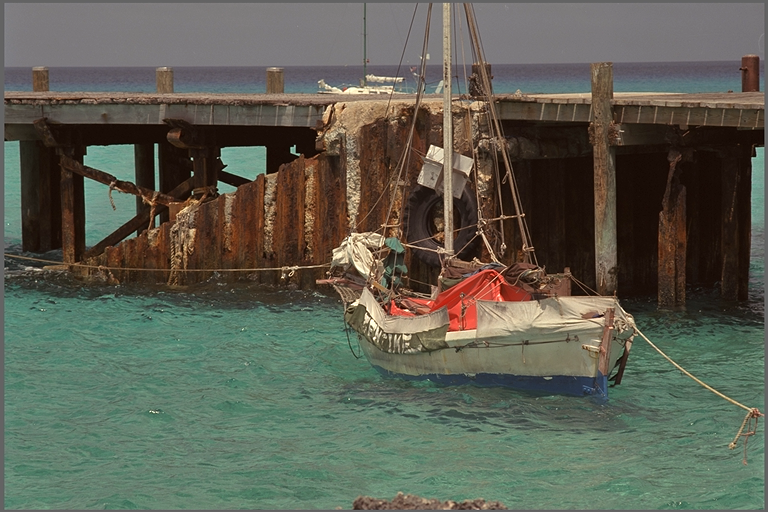

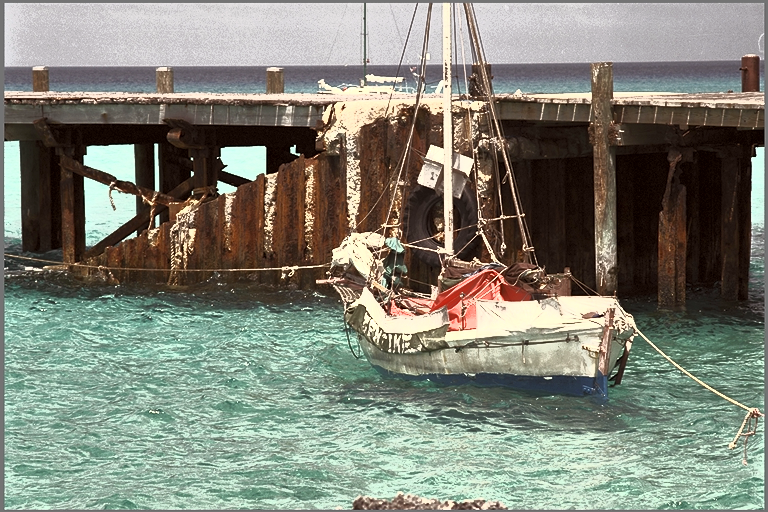

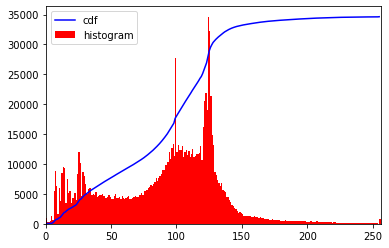

In [10]:
imshow(image_original, "image_original")

colimage = cv2.imread(data_dir+"../color/boat2_col.png")

img_yuv = cv2.cvtColor(colimage, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) # wyrównanie histogramu kanału Y

image_modified = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # przekonwertujemy obraz YUV z powrotem do formatu BGR
imshow(image_modified, "equalizeHist")
cv2.imwrite(data_dir+"../../out_image.png", image_modified)

hist,bins = np.histogram(image_original.flatten(),256,[0,256]) 

cdf = hist.cumsum()
modified_image = cdf * hist.max()/ cdf.max()

plt.plot(modified_image, color = 'b')
plt.hist(image_original.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

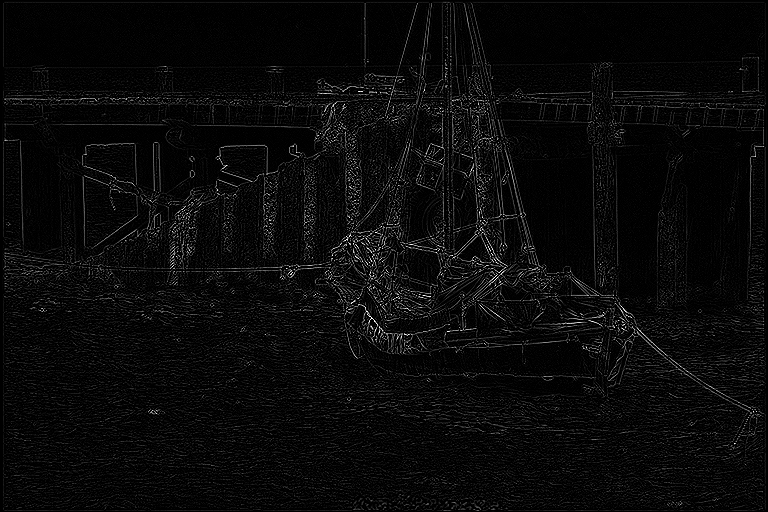

col_laplacian, wymiary: (512, 768), typ danych: int16, wartości: -590 - 566
image_original, wymiary: (512, 768, 3), typ danych: uint8, wartości: 0 - 255


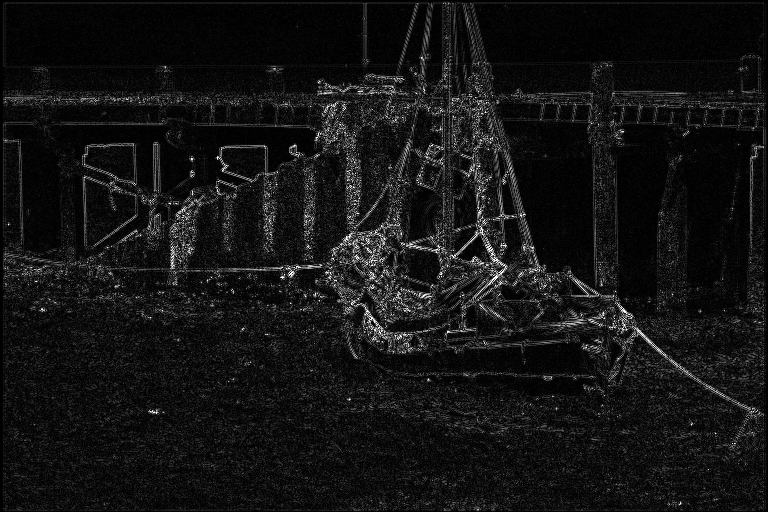

In [ ]:
col_gblur = cv2.GaussianBlur(colimage, (3, 3), 0)
img_gray = cv2.cvtColor(colimage, cv2.COLOR_BGR2GRAY)

col_laplacian = cv2.Laplacian(img_gray, cv2.CV_16S, 5)
imshow(col_laplacian, "col_laplacian")
printi(col_laplacian, "col_laplacian")
printi(image_original, "image_original")
outX = cv2.convertScaleAbs(col_laplacian)
#col_laplacian = cv2.addWeighted(img_gray, 0.5, col_laplacian, 0.5, 0)
#imshow(image_original, "original image")
imshow(outX, "col_laplacian")